# PyTorch中的张量

张量表示一个由数值组成的数组, 这个数组可能有多个维度(轴). 具有一个轴的张量对应数学上的向量(vector), 具有两个轴的张量对应数学上的矩阵(matrix), 具有两个以上轴的张量没有特定的数学名称.

In [42]:
import torch

# 创建一个行向量
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
# 获取张量的形状
x.shape

torch.Size([12])

In [44]:
# 获取张量中元素的数量
x.numel()

12

In [45]:
# 改变张量的形状
# 将1x12的向量转换成3x4的矩阵
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [46]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [47]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

# 单层感知机

![](assets/单层感知机.svg)

图中$w_1$和$w_2$是权重, 还有没画出的偏置(bias): b.

所以这个单层感知机的公式是: $o=w_1x_1+w_2x_2+b$

可以看到以上的公式是一个**线性**的公式. 为了模拟非线性的情况, 我们经常会乘上一个**激活函数**$\sigma$, 那么上面的公式变成如下:

$$
o = \sigma(w_1x_1+w_2x_2+b)
$$

常见的激活函数有: ReLU, sigmoid, tanh

当然GPT模型使用了一种叫做GeLU的激活函数

公式分别如下:

ReLU: $f(x)=\max(x,0)$

sigmoid: $f(x)=\frac{1}{1+e^{-x}}$

tanh: $f(x)=\frac{1-e^{-2x}}{1+e^{-2x}}$

GeLU: $f(x)=0.5x(1+\tanh(\sqrt{\frac{2}{\pi}}(x+0.044715x^3)))$

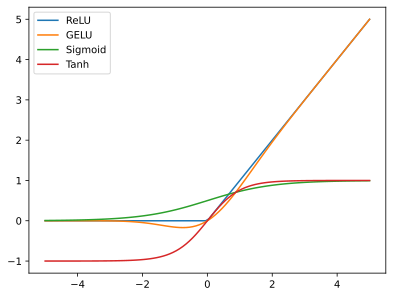

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU
x = np.linspace(-5, 5, 100)
y_relu = np.maximum(x, 0)

plt.plot(x, y_relu, label='ReLU')

# GELU
y_gelu = 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

plt.plot(x, y_gelu, label='GELU')

# Sigmoid
y_sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, y_sigmoid, label='Sigmoid')

# Tanh
y_tanh = np.tanh(x)

plt.plot(x, y_tanh, label='Tanh')

plt.legend()
plt.show()

# 多层感知机

在输入层和输出层之间加入一些隐藏层就是多层感知机了. 如下图:


![](assets/多层感知机.svg)

多层感知机是单层感知机的推广.

输入层和隐藏层之间的连线有权重, 隐藏层和输出层之间的连线也有权重.

$x_i$和$h_j$之间的权重是$w^{(1)}_{ij}$, 上标$(1)$表示第0层和第1层之间的权重是第1组权重.

$h_i$和$o_j$之间的权重是$w^{(2)}_{ij}$, 上标$(2)$表示第1层和第2层之间的权重是第2组权重.

我们以$h_1 \to h_5$如何求出来的举个例子:

$$
\begin{equation}
\begin{split}
h_1 &= x_1w^{(1)}_{11}+x_2w^{(1)}_{21}+x_3w^{(1)}_{31}+x_4w^{(1)}_{41}+b^{(1)}_1 \\
h_2 &= x_1w^{(1)}_{12}+x_2w^{(1)}_{22}+x_3w^{(1)}_{32}+x_4w^{(1)}_{42}+b^{(1)}_2 \\
h_3 &= x_1w^{(1)}_{13}+x_2w^{(1)}_{23}+x_3w^{(1)}_{33}+x_4w^{(1)}_{43}+b^{(1)}_3 \\
h_4 &= x_1w^{(1)}_{14}+x_2w^{(1)}_{24}+x_3w^{(1)}_{34}+x_4w^{(1)}_{44}+b^{(1)}_4 \\
h_5 &= x_1w^{(1)}_{15}+x_2w^{(1)}_{25}+x_3w^{(1)}_{35}+x_4w^{(1)}_{45}+b^{(1)}_5
\end{split}
\end{equation}
$$

上面的公式如果改成矩阵表示就是下面的样子:

圆括号矩阵:
$$
\begin{bmatrix}
h_1 &
h_2 &
h_3 &
h_4 &
h_5
\end{bmatrix}
=
\begin{bmatrix}
x_1 & x_2 & x_3 & x_4
\end{bmatrix}
\begin{bmatrix}
w^{(1)}_{11} & w^{(1)}_{12} & w^{(1)}_{13} & w^{(1)}_{14} & w^{(1)}_{15} \\
w^{(1)}_{21} & w^{(1)}_{22} & w^{(1)}_{23} & w^{(1)}_{24} & w^{(1)}_{25} \\
w^{(1)}_{31} & w^{(1)}_{32} & w^{(1)}_{33} & w^{(1)}_{34} & w^{(1)}_{35} \\
w^{(1)}_{41} & w^{(1)}_{42} & w^{(1)}_{43} & w^{(1)}_{44} & w^{(1)}_{45} \\
\end{bmatrix}
+
\begin{bmatrix}
b^{(1)}_1 &
b^{(1)}_2 &
b^{(1)}_3 &
b^{(1)}_4 &
b^{(1)}_5
\end{bmatrix}
$$

上面的矩阵我们可以使用矩阵符号来简化, 这样看起来更简洁:

$$
H=XW^{(1)}+b^{(1)}
$$

同理还有:

$$
O=HW^{(2)}+b^{(2)}
$$

$O$是输出向量$[o_1,o_2,o_3]$

为了不让多层感知机成为线性模型, 我们在求隐藏层的数值时, 引入激活函数, 所以上面的公式就变成了:

$$
\begin{equation}
\begin{split}
H &= \sigma(XW^{(1)}+b^{(1)}) \\
O &= \sigma(HW^{(2)}+b^{(2)})
\end{split}
\end{equation}
$$

在这个多层感知机中, 隐藏层的层数, 神经元的数量, 这些都叫**超参数**, 因为这些**超参数**都必须我们程序员自己指定.

而权重和偏置是训练模型的过程自动生成的. 这些是**参数**. 当模型训练完成以后, 这些**参数**就固定下来了.

那么训练的过程是什么呢? 以mnist数据集举个例子. mnist数据集是手写数字的数据集. 并且已经标注过了, 也就是每个手写数字对应的数字是什么已经标注过了. 如下图是mnist数据集中的一张手写数字图片:

![](assets/手写数字.png)

这张图片在数据集中已经标注为了数字`5`.

这张图片的分辨率也就是像素点是$28\times 28=784$个. 所以我们的输入向量$X$一共有$784$个元素: $[x_1, x_2, \ldots, x_{784}]$

输出向量$O$一共有10个元素: $[o_0, o_1, \ldots, o_9]$. 这个向量记录的是每个类别的概率.

那么我们最终训练好的模型应该有如下作用, 那就是:

1. 将手写数字图片转换成784维的$X$向量.
2. 输入给多层感知机
3. 最后的输出是$O$向量.
4. 在$O$向量中寻找最大的元素, 例如如果最大的元素是: $o_2$, 那么神经网络的预测就是这张手写图片是数字2. 因为$o_2$最大, 而$o_2$表示手写数字是2的概率(可能性), 所以神经网络会预测图片是数字2.

训练模型的过程如下:

1. 将多层感知机中权重和偏置初始化为随机值
2. 将标注好的图片数据输入到神经网络中, 观察输出和标注结果的误差
3. 将误差反向传播, 这个过程会自动调节网络中的权重参数和偏置参数. 这一步是最精髓的一步.
4. 重复2-3这两步, 直到输出和标注结果的误差足够小, 模型就训练完成了.

下面我们用PyTorch实现一个多层感知机, 用来识别手写数字图片.

首先下载手写数字图片数据集.

In [49]:
import torchvision
from torchvision import transforms
from torch.utils import data

def load_data_mnist(batch_size, resize=None):
    """
    下载MNIST手写数字数据集然后加载到内存中.
    batch_size: 数据批的大小, 也就是下载多少条数据
    """
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    # 训练数据集
    mnist_train = torchvision.datasets.MNIST(
        root="./mnist-data", train=True, transform=trans, download=True)
    # 测试数据集
    mnist_test = torchvision.datasets.MNIST(
        root="./mnist-data", train=False, transform=trans, download=True)
    # 下载数据集并返回
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))

In [50]:
# 批的大小是256
batch_size = 256
# 训练数据集和测试数据集分别下载256张图片
train_iter, test_iter = load_data_mnist(batch_size)

我们像上面讲过的**多层感知机**的例子, 构建一个神经网络, 包含:

- 一个输入层$[x_0, \ldots, x_{783}]$
- 一个隐藏层$[h_0, \ldots, h_{255}]$
- 一个输出层$[o_0, \ldots, o_9]$

所以公式如下:

$$
\begin{equation}
\begin{split}
H &= \sigma(XW^{(1)}+b^{(1)}) \\
O &= \sigma(HW^{(2)}+b^{(2)})
\end{split}
\end{equation}
$$

激活函数$\sigma$我们选择使用ReLU函数

损失函数我们选择**交叉熵**函数, 用来在神经网络的训练过程中度量输出和标准答案之间的误差.

In [51]:
# 输入层的向量大小是784个元素
# 隐藏层的向量大小是256个元素
# 输出层的向量大小是10个元素
num_inputs, num_outputs, num_hiddens = 784, 10, 256

import torch
from torch import nn

# 随机初始化输入层到隐藏层的权重矩阵W1
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
# 随机初始化输入层到隐藏层的偏置向量b1
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
# 随机初始化隐藏层到输出层的权重矩阵W2
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
# 随机初始化隐藏层到输出层的偏置向量b2
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [52]:
# relu函数的实现
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [53]:
# 将网络的公式转换成网络的代码
def net(X):
    # 将28x28的矩阵展平成1x768的向量
    X = X.reshape(-1, num_inputs)
    # 计算隐藏层的值
    H = relu(X@W1 + b1) # 这里的@代表矩阵乘法
    # 计算输出的值并返回
    return (H@W2 + b2)

In [54]:
# 损失函数使用交叉熵函数
loss = nn.CrossEntropyLoss(reduction='none')

下面写一些辅助函数

In [17]:
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
from IPython import display

def use_svg_display():
    """
    使用svg格式显示图片
    """
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """
    设置图片大小
    """
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """
    设置坐标图的一些属性
    """
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """
    画图
    """
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

class Accumulator:
    """
    聚合函数
    """
    def __init__(self, n):
        """Defined in :numref:`sec_softmax_scratch`"""
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]    

class Animator:
    """
    使用动画展示画图过程, 动态的画图
    """
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        """Defined in :numref:`sec_softmax_scratch`"""
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
        
def get_mnist_labels(labels):
    """
    返回MNIST数据集的文本标签.
    """
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

# 重命名一些功能函数
argmax = lambda x, *args, **kwargs: x.argmax(*args, **kwargs)
reshape = lambda x, *args, **kwargs: x.reshape(*args, **kwargs)
astype = lambda x, *args, **kwargs: x.type(*args, **kwargs)
reduce_sum = lambda x, *args, **kwargs: x.sum(*args, **kwargs)
size = lambda x, *args, **kwargs: x.numel(*args, **kwargs)

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """
    显示图片
    """
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

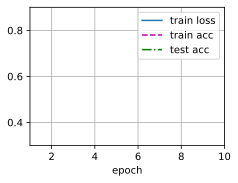

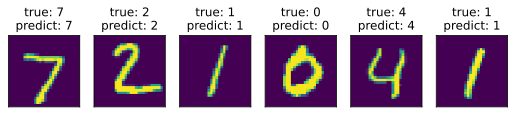

In [19]:
def accuracy(y_hat, y):
    """
    返回值: 计算预测准确率的函数
    """
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = argmax(y_hat, axis=1)
    cmp = astype(y_hat, y.dtype) == y
    return float(reduce_sum(astype(cmp, y.dtype)))

def evaluate_accuracy(net, data_iter):
    """
    计算模型在数据集上的预测准确率
    """
    # 如果net变量是一个网络, 则评估网络
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # [正确预测的总数量, 预测的总数量]

    # 禁用梯度计算功能
    # 因为计算模型预测准确性不需要梯度计算
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), size(y))
    # 预测准确率 = 正确预测的总数量 / 预测的总数量
    return metric[0] / metric[1]

def train_epoch_mnist(net, train_iter, loss, updater):
    """
    每轮训练的逻辑代码
    """
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        # 训练模型
        net.train()
    # (训练的总误差, 训练准确性的总和, 例子的数量)
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度, 更新参数
        # 给定输入图片X, 则y_hat为当前模型的预测值
        y_hat = net(X)
        # 计算预测值y_hat和正确答案y之间的误差, 也就是损失
        l = loss(y_hat, y)
        # 然后使用随机梯度下降优化器将误差反向传播
        # 在误差反向传播的过程中更新网络中的权重参数和偏置参数
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失标准
            updater.zero_grad()
            l.mean().backward() # 反向传播
            updater.step()
        else:
            # 使用自定义优化器和损失标准
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练准确度
    return metric[0] / metric[2], metric[1] / metric[2]

def train_mnist_model(net, train_iter, test_iter, loss, num_epochs, updater):
    """
    训练模型
    """
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        # 1轮训练
        train_metrics = train_epoch_mnist(net, train_iter, loss, updater)
        # 评估准确性
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    # 一些断言
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

def predict_mnist(net, test_iter, n=6):
    """
    预测标签
    net: 训练好的网络
    test_iter: 测试数据集
    n: 取测试数据集中的多少张图片来预测
    """
    for X, y in test_iter:
        break
    # 标准答案标签
    trues = get_mnist_labels(y)
    # 预测结果: 从网络的输出中寻找最大值的下标索引
    preds = get_mnist_labels(argmax(net(X), axis=1))
    titles = ['true: ' + true +'\npredict: ' + pred for true, pred in zip(trues, preds)]
    # 显示被预测的手写图片
    show_images(
        reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

# 训练10轮, 学习率是0.1
num_epochs, lr = 10, 0.1
# 使用随机梯度下降算法来更新网络中的权重参数和偏置参数
updater = torch.optim.SGD(params, lr=lr)
# 训练预测手写数字的模型
train_mnist_model(net, train_iter, test_iter, loss, num_epochs, updater)
# 使用测试数据集测试一下预测的准确率
predict_mnist(net, test_iter)

# 以上模型的简洁实现

`torch.nn.Linear`用来定义一个线性变换

$$
y=xA^T+b
$$

我们举一个例子:

$x$是一个$128 \times 20$的二维矩阵. $A$是一个$30 \times 20$的二维矩阵, 那么$A^T$是一个$20 \times 30$的二维矩阵,

那么$y$是一个$128 \times 30$的二维矩阵.

`nn.Linear`接收三个参数:

- `in_features`: 输入$x$的列数
- `out_features`: 输出$y$的列数
- `bias`: 是否添加偏置, 默认是`True`

In [22]:
m = nn.Linear(20, 30)
# 初始化一个128x20的矩阵, 元素是随机数
input = torch.randn(128, 20)
output = m(input)
# 打印输出的矩阵尺寸
print(output.size())

torch.Size([128, 30])


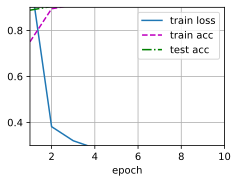

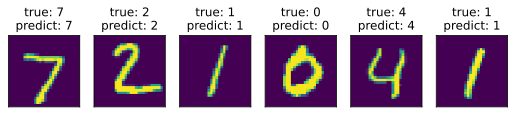

In [20]:
# 组合一个神经网络出来
# 也就是将之前的公式转化成以下代码
net = nn.Sequential(nn.Flatten(),          # 展平数据
                    nn.Linear(784, 256),   # H = W1 * X + b1
                    nn.ReLU(),             # H = relu(H)
                    nn.Linear(256, 10))    # O = W2 * H + b2

# 初始化网络中的参数(权重和偏置)
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# 初始化网络中的参数
net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
# SGD: 随机梯度下降
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = load_data_mnist(batch_size)
train_mnist_model(net, train_iter, test_iter, loss, num_epochs, trainer)
predict_mnist(net, test_iter)